In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from common import Images, Fonts, Data
from matplotlib.patches import Rectangle, Ellipse, Arc

In [2]:
season = "2023"
df = Data.get_nwsl_goals(season = season)
df = df.rename(columns={"period": "half", "minute": "min", "second": "sec"})
df

,season,date,home,away,player,team,assist,half,min,sec,x,y
2161,2023,2023-03-25,NC,KC,Mille Gejl Jensen,NC,Narumi Miura,1,22,24,70.4,63.8
2162,2023,2023-03-25,SD,CHI,Yuki Ogimi Nagasato,CHI,NaN,1,17,41,97.6,47.4
2163,2023,2023-03-25,SD,CHI,Amirah Ali,SD,NaN,1,21,34,98.3,48.4
2164,2023,2023-03-25,SD,CHI,Jaedyn Shaw,SD,NaN,1,31,7,81.6,50.4
2165,2023,2023-03-25,SD,CHI,Mallory Pugh Swanson,CHI,NaN,1,48,18,88.5,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2023,2023-10-20,RGN,LA,Veronica Latsko,RGN,Phoebe McClernon,2,86,32,91.0,47.0
2501,2023,2023-10-22,NC,NJY,Delanie Sheehan,NJY,Bruninha,1,44,56,89.9,31.0
2502,2023,2023-10-22,NC,NJY,Yazmeen Ryan,NJY,Lynn Williams,2,90,40,87.4,43.3
2503,2023,2023-11-05,POR,NJY,Katie Stengel,NJY,Kristie Mewis,4,106,10,81.5,37.3


In [3]:
field = "white"
lines = "black"

<Figure size 720x576 with 0 Axes>

<Figure size 12000x9600 with 0 Axes>

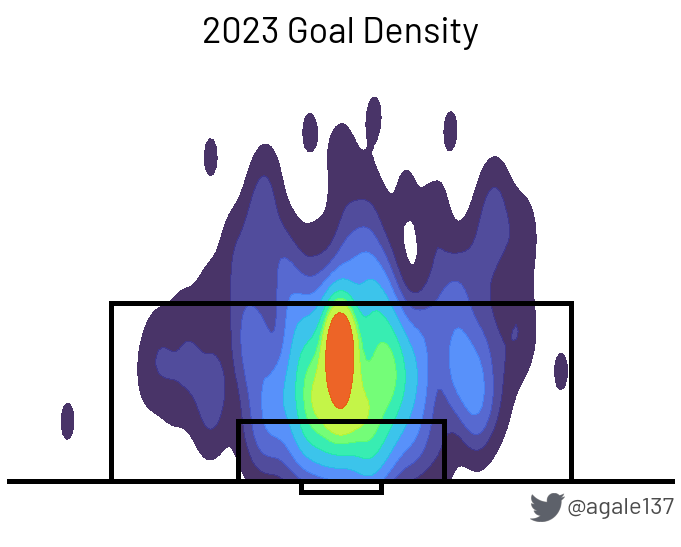

In [6]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=1200, facecolor=field)
fig, ax = plt.subplots()
fig.tight_layout()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([60, 105])
plt.xlim([8, 92])
ax.invert_yaxis()

# Build the field
# Touchline
ax.add_patch(Rectangle((0, 0), 100, 100, ec=lines, fc=field, lw=5))

# Heatmap
hm = sns.kdeplot(
    x=df["y"], y=df["x"], cmap="turbo", shade=True, levels=10, bw_adjust=0.4, alpha=0.9
)

# Cover the heatmap off the field
ax.add_patch(Rectangle((0, 100), 100, 10, ec=None, fc=field))

# Center circle
# ax.add_patch(Ellipse((50, 50), 16, 26, ec=lines, fill=False, lw=5))
# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=5))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 15), 58, 15, ec=lines, fill=False, lw=5))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 5), 26, 5, ec=lines, fill=False, lw=5))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=5))

# Title
plt.text(
    50,
    63,
    season + " Goal Density",
    fontsize=36,
    fontproperties=Fonts.BARLOW,
    ha="center",
)

# Twitter logo and username
plt.text(
    1,
    0.06,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.77, 0.08, 0.05, 0.05], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig(
    "images/goal_density_" + season + ".png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
)

<Figure size 720x576 with 0 Axes>

<Figure size 12000x9600 with 0 Axes>

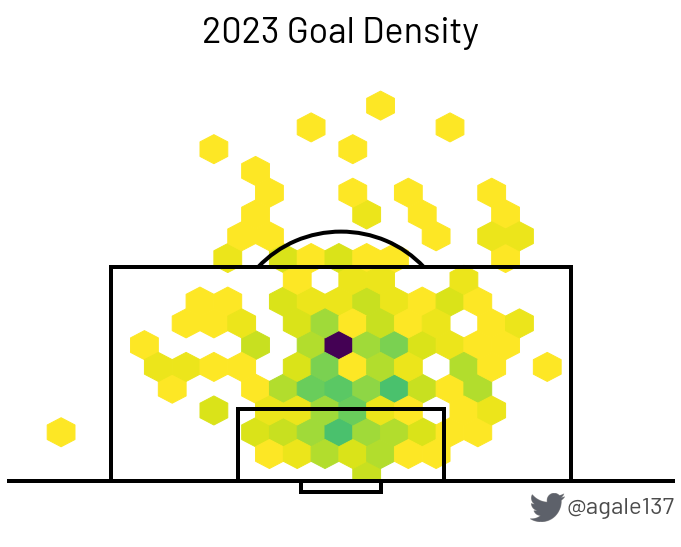

In [8]:
# Set up plot
plt.clf()
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=1200, facecolor=field)
fig, ax = plt.subplots()
fig.tight_layout()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_xticks([])
ax.set_yticks([])
plt.ylim([60, 105])
plt.xlim([8, 92])
ax.invert_yaxis()

# Plot data
plt.hexbin(df["y"], df["x"], gridsize=(22, 27), cmap="viridis_r", mincnt=1)

# Cover the heatmap off the field
ax.add_patch(Rectangle((0, 100), 100, 10, ec=None, fc=field))

# Endline
ax.add_patch(Rectangle((0, 50), 100, 50, ec=lines, fill=False, lw=4))
# 18-yard box
ax.add_patch(Rectangle((21, 100 - 18), 58, 18, ec=lines, fill=False, lw=4))
# 6-yard box
ax.add_patch(Rectangle((37, 100 - 6), 26, 6, ec=lines, fill=False, lw=4))
# Goal
ax.add_patch(Rectangle((45, 100), 10, 1, ec=lines, fill=False, lw=4))
# Penalty arc
ax.add_artist(
    Arc((50, 100 - 12), 28, 18, angle=0, theta1=210, theta2=330, ec=lines, lw=4)
)

# Title
plt.text(
    50, 63, season + " Goal Density", fontsize=36, fontproperties=Fonts.BARLOW, ha="center"
)

# Twitter logo and username
plt.text(
    1,
    0.06,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.77, 0.08, 0.05, 0.05], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig("images/goal_density2_" + season + ".png", bbox_inches="tight", transparent=False, pad_inches=0.5)